# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Outputs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Define base url for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Identify lists for dataframe
names = []
identification = []
lats = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#Create for loop to run through each city
for city in cities:
    query_url = base_url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url)
    weather_json = response.json()
    
    #Append each list for dataframe, making sure to have an out for errors
    try:
        if weather_json["sys"]["id"] > 0:
            loc = weather_json["name"]
            names.append(loc)
        ids = weather_json["sys"]["id"]
        identification.append(ids)
        lat = weather_json["coord"]["lat"]
        lats.append(lat)
        temp = weather_json["main"]["temp_max"]
        temperature.append(temp)
        humid = weather_json["main"]["humidity"]
        humidity.append(humid)
        cloud = weather_json["clouds"]["all"]
        cloudiness.append(cloud)
        wind = weather_json["wind"]["speed"]
        wind_speed.append(wind)
        
        print(f"Processing Data for {ids}: {loc}")
        
    except KeyError:
        print("No data available - moving to next city.")
    
    

Processing Data for 2011706: Busselton
No data available - moving to next city.
Processing Data for 1756: Oxelosund
Processing Data for 7151: Cabo San Lucas
Processing Data for 7271: Avarua
Processing Data for 7881: Hilo
Processing Data for 5416: Ojinaga
No data available - moving to next city.
Processing Data for 8841: Suraabad
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 81: Tasiilaq
Processing Data for 7873: Kapaa
Processing Data for 2008959: Mataura
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 9650: Xushan
No data available - moving to next city.
Processing Data for 6452: Souillac
Processing Data for 8776: Georgetown
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 2006131: Hermanus
Processing Dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Create output file location for graphs
output = "C:\\Users\\kenda\\OneDrive\\Documents\\GitHub\\ClassSubmissions\\Homeworks\\06-Pythons-API\\Homework\\Instructions\\starter_code\\Outputs\\"

#Create dataframe
data = {"City": names, "City ID": identification, "Location": lats, "Temperature": temperature, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed}
data_df = pd.DataFrame(data)
data_df

#Convert DF to CSV and save file
data_df.to_csv(output_data_file, index = False)

#View df
data_df.head(10)



,City,City ID,Location,Temperature,Humidity,Cloudiness,Wind Speed
0,Busselton,2011706,-33.64,284.26,63,68,7.51
1,Oxelosund,1756,58.67,287.15,100,0,0.37
2,Cabo San Lucas,7151,22.89,308.71,52,20,2.10
3,Avarua,7271,-21.21,299.15,83,100,3.10
4,Hilo,7881,19.71,302.15,70,90,4.60
5,Ojinaga,5416,29.56,311.15,19,1,2.10
6,Suraabad,8841,40.82,298.15,57,75,12.30
7,Tasiilaq,81,65.61,277.15,100,85,3.10
8,Kapaa,7873,22.08,305.15,62,20,4.60
9,Mataura,2008959,-46.19,282.59,77,86,4.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

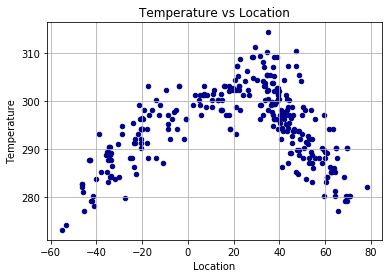

In [15]:
latvtemp = data_df.plot.scatter(x = 'Location', y = 'Temperature', c='DarkBlue', title ="Temperature vs Location", grid = True)

latvtemp.get_figure().savefig(output+"latvtemp.png")


#### Latitude vs. Humidity Plot

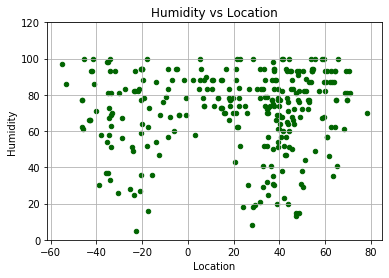

In [17]:
latvhum = data_df.plot.scatter(x = 'Location', y = 'Humidity', c='DarkGreen', title ="Humidity vs Location", grid = True, ylim = [0,120])

latvhum.get_figure().savefig(output+"latvhum.png")

#### Latitude vs. Cloudiness Plot

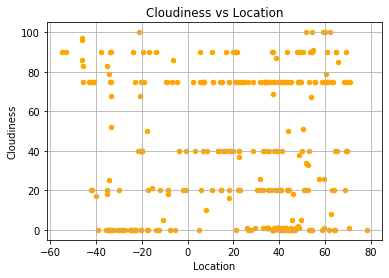

In [18]:
latvcloud = data_df.plot.scatter(x = 'Location', y = 'Cloudiness', c='Orange', title ="Cloudiness vs Location", grid = True)

latvcloud.get_figure().savefig(output+"latvcloud.png")

#### Latitude vs. Wind Speed Plot

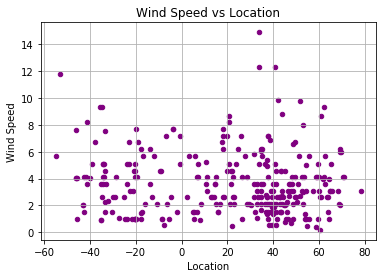

In [20]:
latvwind = data_df.plot.scatter(x = 'Location', y = 'Wind Speed', c='Purple', title ="Wind Speed vs Location", grid = True)

latvwind.get_figure().savefig(output+"latvwind.png")